<a href="https://colab.research.google.com/github/woodwyyn/ML/blob/main/ML6_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ***Понижение размерности***

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

***PCA на сгенерированных данных***

Генерируем двумерный набор данных

In [4]:
n_samples = 100
x = np.random.normal(0, 1, n_samples)  # Первый признак
y = 2 * x + np.random.normal(0, 0.5, n_samples)  # Второй признак (коррелирован с первым)

X = np.column_stack((x, y))

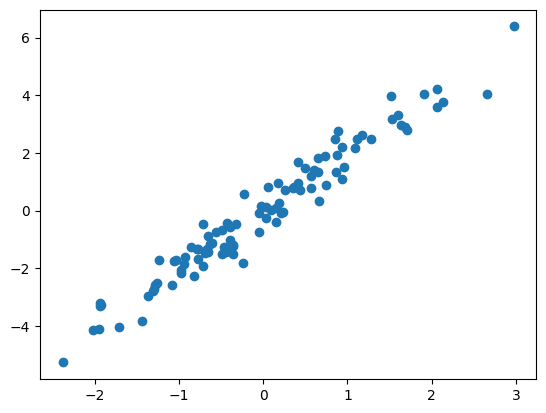

In [5]:
plt.scatter(x, y)

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1)
X_pca = pca.fit_transform(X)

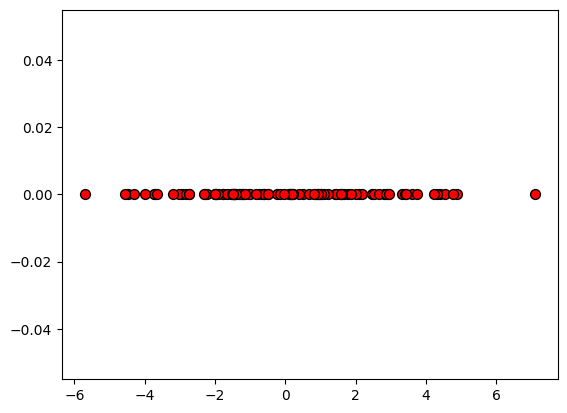

In [7]:
plt.scatter(X_pca, np.zeros_like(X_pca), c='red', edgecolor='k', s=50)

***PCA на многомерных данных***

In [8]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()
X = data.data
y = data.target
X.shape

(569, 30)

Производим нормализацию, выбираем 2 главных компонента и визуализируем

In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=2)  # Уменьшаем до 2 компонент
X_pca = pca.fit_transform(X_scaled)

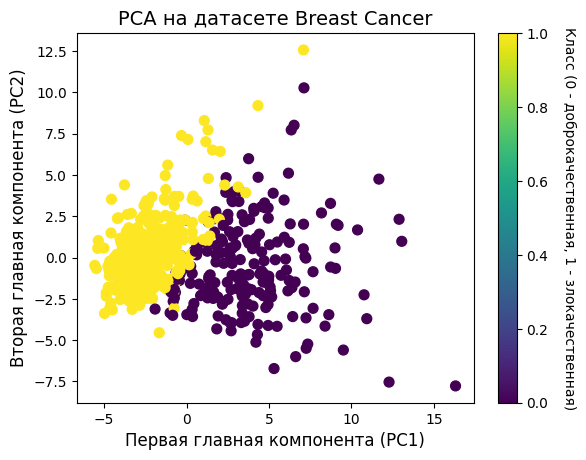

In [12]:
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1],
                     c=y, cmap='viridis', s=50)
plt.xlabel('Первая главная компонента (PC1)', fontsize=12)
plt.ylabel('Вторая главная компонента (PC2)', fontsize=12)
plt.title('PCA на датасете Breast Cancer', fontsize=14)
cbar = plt.colorbar(scatter)
cbar.set_label('Класс (0 - доброкачественная, 1 - злокачественная)', rotation=270, labelpad=20, fontsize=10)
plt.show()

In [13]:
print(f"Главная компонента (направление): {pca.components_}")

Главная компонента (направление): [[ 0.21890244  0.10372458  0.22753729  0.22099499  0.14258969  0.23928535
   0.25840048  0.26085376  0.13816696  0.06436335  0.20597878  0.01742803
   0.21132592  0.20286964  0.01453145  0.17039345  0.15358979  0.1834174
   0.04249842  0.10256832  0.22799663  0.10446933  0.23663968  0.22487053
   0.12795256  0.21009588  0.22876753  0.25088597  0.12290456  0.13178394]
 [-0.23385713 -0.05970609 -0.21518136 -0.23107671  0.18611302  0.15189161
   0.06016536 -0.0347675   0.19034877  0.36657547 -0.10555215  0.08997968
  -0.08945723 -0.15229263  0.20443045  0.2327159   0.19720728  0.13032156
   0.183848    0.28009203 -0.21986638 -0.0454673  -0.19987843 -0.21935186
   0.17230435  0.14359317  0.09796411 -0.00825724  0.14188335  0.27533947]]


In [14]:
explained_variance = pca.explained_variance_ratio_
print(f"Объясненная дисперсия каждой компоненты: {explained_variance}")
print(f"Суммарная объясненная дисперсия: {sum(explained_variance):.2f}")

Объясненная дисперсия каждой компоненты: [0.44272026 0.18971182]
Суммарная объясненная дисперсия: 0.63


***Метод локтя для PCA***

In [19]:
n_components_range = range(1, 31)
explained_variance = []

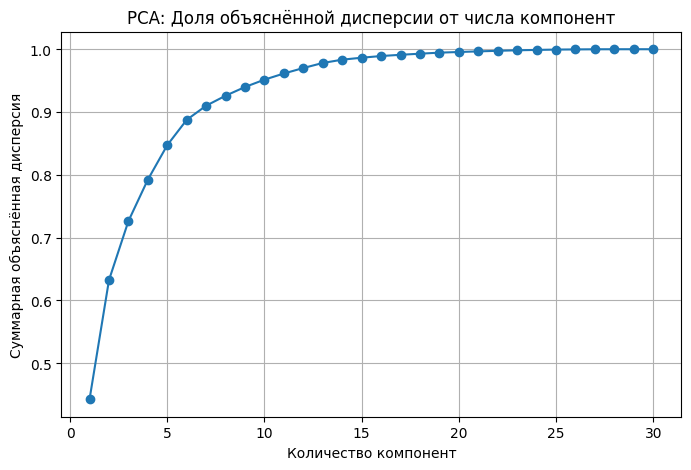

In [20]:
for n in n_components_range:
    pca = PCA(n_components=n)
    pca.fit(X_scaled)
    explained_variance.append(sum(pca.explained_variance_ratio_))

plt.figure(figsize=(8, 5))
plt.plot(n_components_range, explained_variance, marker='o', linestyle='-')
plt.xlabel('Количество компонент')
plt.ylabel('Суммарная объяснённая дисперсия')
plt.title('PCA: Доля объяснённой дисперсии от числа компонент')
plt.grid(True)
plt.show()

Объяснённая дисперсия каждой компоненты: [0.44272026 0.18971182 0.09393163 0.06602135 0.05495768 0.04024522
 0.02250734]
Суммарная объяснённая дисперсия: 0.91


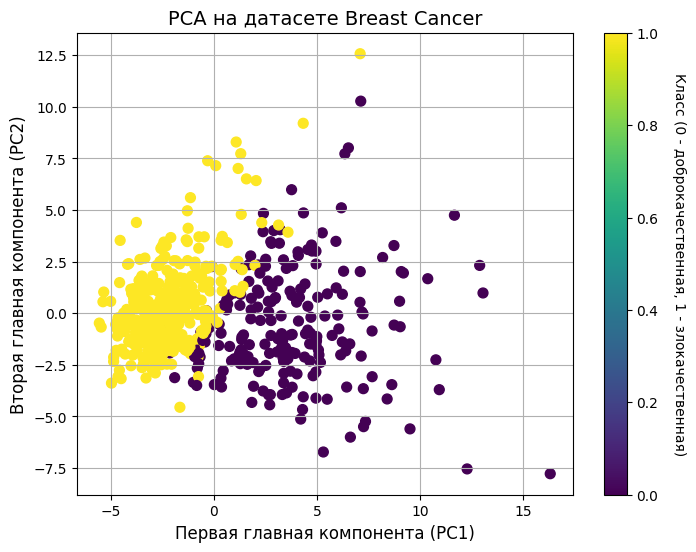

In [21]:
pca = PCA(n_components=7)
X_pca = pca.fit_transform(X_scaled)

# Печатаем объяснённую дисперсию
explained_variance = pca.explained_variance_ratio_
print(f"Объяснённая дисперсия каждой компоненты: {explained_variance}")
print(f"Суммарная объяснённая дисперсия: {sum(explained_variance):.2f}")

# Визуализация по двум первым компонентам
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1],
                      c=y, cmap='viridis', s=50)
plt.xlabel('Первая главная компонента (PC1)', fontsize=12)
plt.ylabel('Вторая главная компонента (PC2)', fontsize=12)
plt.title('PCA на датасете Breast Cancer', fontsize=14)
cbar = plt.colorbar(scatter)
cbar.set_label('Класс (0 - доброкачественная, 1 - злокачественная)', rotation=270,
               labelpad=20, fontsize=10)
plt.grid(True)
plt.show()

***Метод LDA***

In [22]:
n_samples = 100

x1 = np.random.normal(2, 1, n_samples)
y1 = np.random.normal(2, 1, n_samples)
x2 = np.random.normal(6, 1, n_samples)
y2 = np.random.normal(6, 1, n_samples)

X = np.vstack((np.column_stack((x1, y1)), np.column_stack((x2, y2))))
y = np.hstack((np.zeros(n_samples), np.ones(n_samples)))

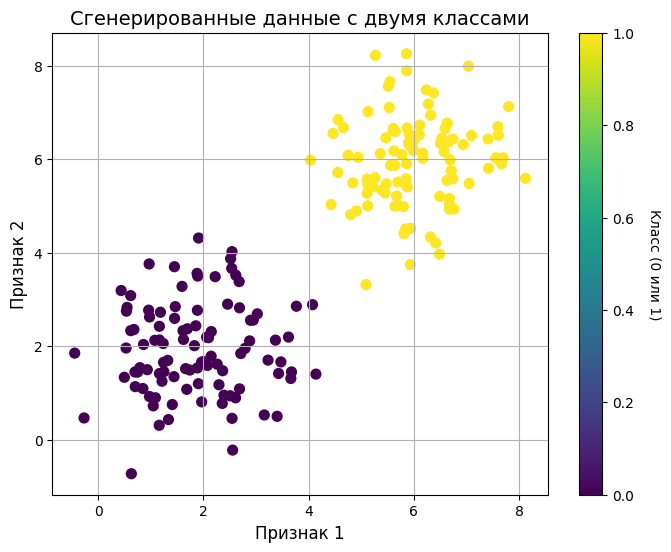

In [32]:
X = np.vstack((np.column_stack((x1, y1)), np.column_stack((x2, y2))))
y = np.hstack((np.zeros(n_samples), np.ones(n_samples)))

# Визуализация
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=50)
plt.xlabel('Признак 1', fontsize=12)
plt.ylabel('Признак 2', fontsize=12)
plt.title('Сгенерированные данные с двумя классами', fontsize=14)
cbar = plt.colorbar(scatter)
cbar.set_label('Класс (0 или 1)', rotation=270, labelpad=20, fontsize=10)
plt.grid(True)
plt.show()

In [33]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

lda = LDA(n_components=1)
X_lda = lda.fit_transform(X_scaled, y)

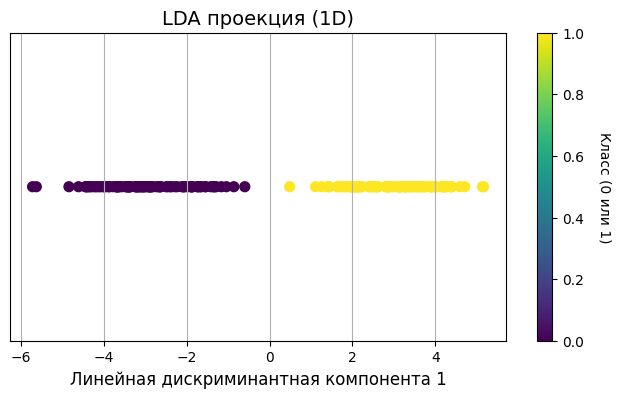

In [34]:
plt.figure(figsize=(8, 4))
scatter = plt.scatter(X_lda[:, 0], np.zeros_like(X_lda), c=y, cmap='viridis', s=50)
plt.xlabel('Линейная дискриминантная компонента 1', fontsize=12)
plt.title('LDA проекция (1D)', fontsize=14)
cbar = plt.colorbar(scatter)
cbar.set_label('Класс (0 или 1)', rotation=270, labelpad=20, fontsize=10)
plt.yticks([])  # убираем ось Y, так как проекция одномерная
plt.grid(True)
plt.show()

In [35]:
print(f"Коэффициенты LDA: {lda.coef_}")

Коэффициенты LDA: [[10.51758384  8.83569259]]


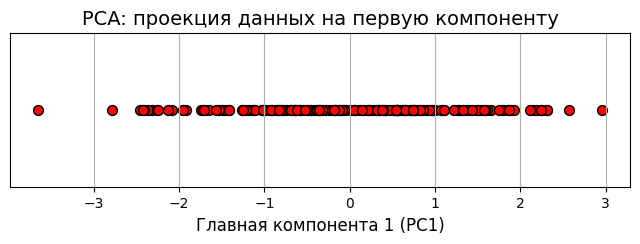

In [45]:
plt.figure(figsize=(8, 2))
plt.scatter(X_pca, np.zeros_like(X_pca), c='red', edgecolor='k', s=50)
plt.xlabel('Главная компонента 1 (PC1)', fontsize=12)
plt.title('PCA: проекция данных на первую компоненту', fontsize=14)
plt.yticks([])
plt.grid(True)
plt.show()

***Метод LDA для анизатропных классов***

In [38]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=200, random_state=170, centers=2)
transformation = [[0.6, -0.6], [-0.4, 0.8]]
X = np.dot(X, transformation)

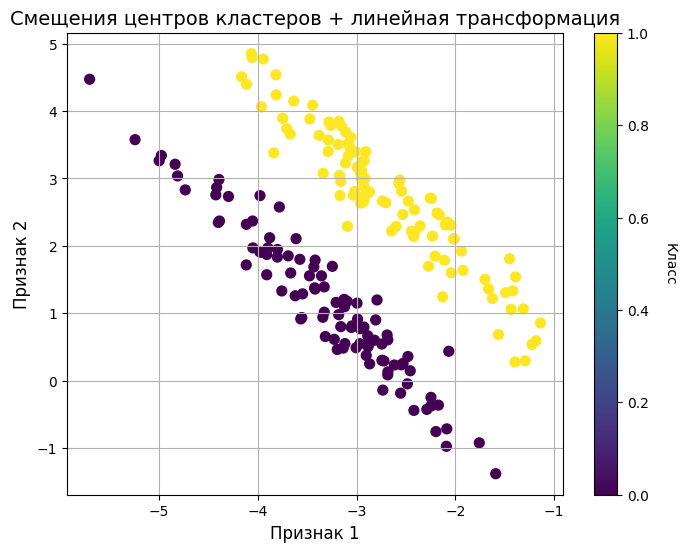

In [39]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=50)
plt.title('Смещения центров кластеров + линейная трансформация', fontsize=14)
plt.xlabel('Признак 1', fontsize=12)
plt.ylabel('Признак 2', fontsize=12)
cbar = plt.colorbar(scatter)
cbar.set_label('Класс', rotation=270, labelpad=20, fontsize=10)
plt.grid(True)
plt.show()

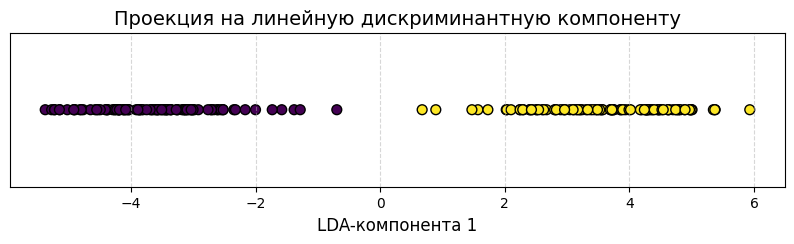

In [41]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# LDA
lda = LDA(n_components=1)
X_lda = lda.fit_transform(X_scaled, y)

# Визуализация проекции LDA на прямую
plt.figure(figsize=(10, 2))
plt.scatter(X_lda, np.zeros_like(X_lda[:, 0]), c=y, cmap='viridis',
            edgecolor='black', s=50)
plt.xlabel('LDA-компонента 1', fontsize=12)
plt.yticks([])  # убираем ось Y для наглядности
plt.title('Проекция на линейную дискриминантную компоненту', fontsize=14)
plt.grid(True, axis='x', linestyle='--', alpha=0.5)
plt.show()

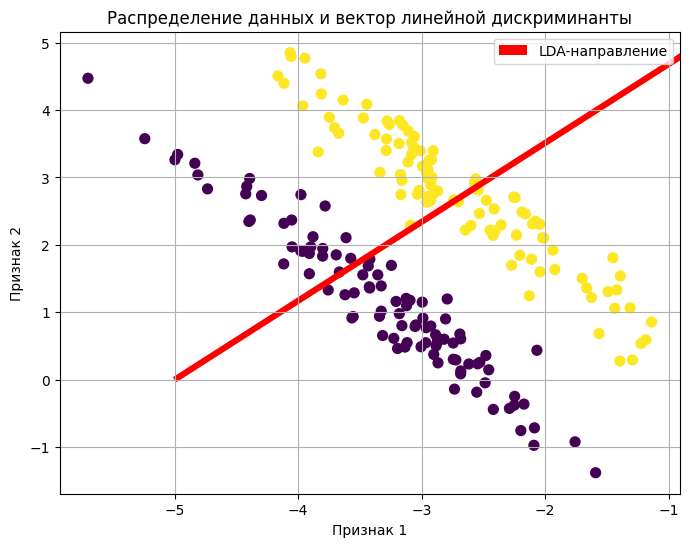

In [43]:
plt.figure(figsize=(8, 6))
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=50)
plt.grid(True)
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.title('Распределение данных и вектор линейной дискриминанты')

# Добавление вектора LDA
plt.quiver(-5, 0, lda.coef_[0][0], lda.coef_[0][1],
           angles='xy', scale_units='xy', scale=1,
           color='red', width=0.01, label='LDA-направление')

plt.legend()
plt.show()

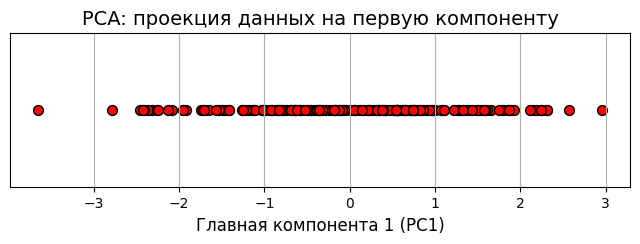

In [47]:
plt.figure(figsize=(8, 2))
plt.scatter(X_pca, np.zeros_like(X_pca), c='red', edgecolor='k', s=50)
plt.xlabel('Главная компонента 1 (PC1)', fontsize=12)
plt.title('PCA: проекция данных на первую компоненту', fontsize=14)
plt.yticks([])
plt.grid(True)
plt.show()

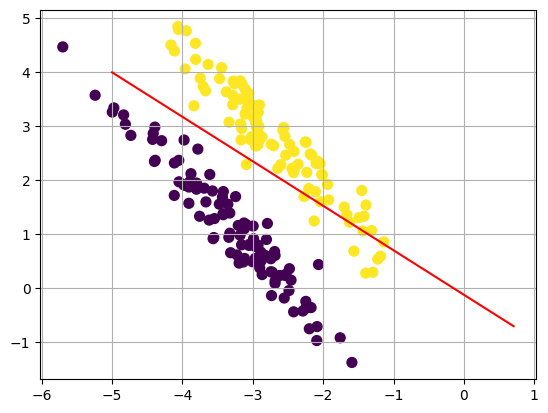

In [49]:
scatter = plt.scatter(X[:, 0], X[:, 1],
                     c=y, cmap='viridis', s=50)
plt.grid(True)
plt.plot([-5, pca.components_[0][0]], [4, pca.components_[0][1]], color='red')

***Метод t-SNE***

In [50]:
n_samples = 100

x1 = np.random.normal(2, 1, n_samples)
y1 = np.random.normal(2, 1, n_samples)
x2 = np.random.normal(6, 1, n_samples)
y2 = np.random.normal(6, 1, n_samples)

X = np.vstack((np.column_stack((x1, y1)), np.column_stack((x2, y2))))
y = np.hstack((np.zeros(n_samples), np.ones(n_samples)))

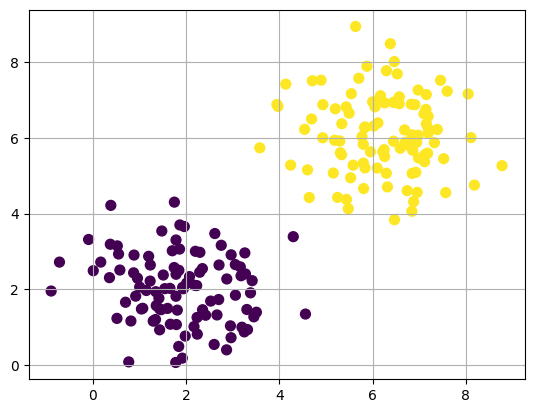

In [51]:
scatter = plt.scatter(X[:, 0], X[:, 1],
                     c=y, cmap='viridis', s=50)
plt.grid(True)

In [52]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=1, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

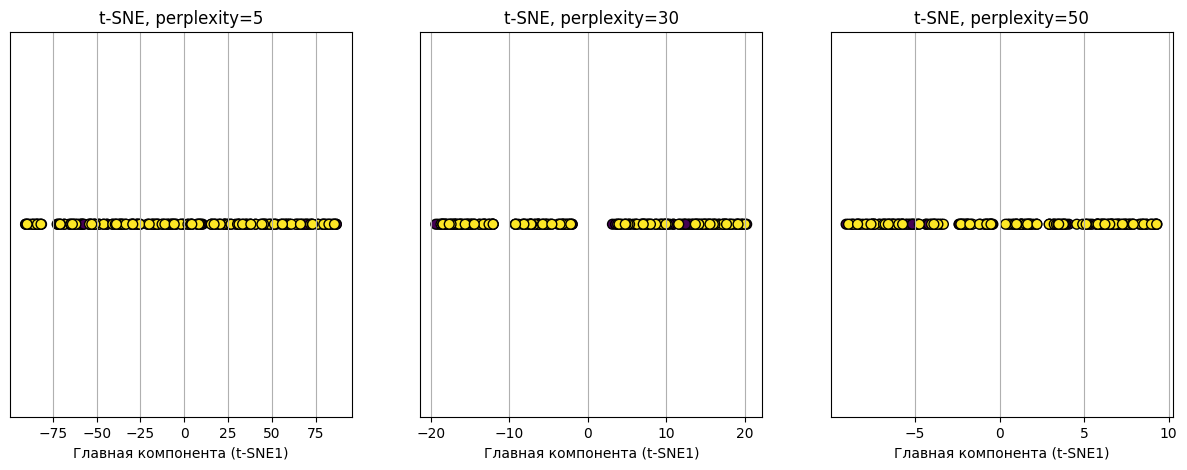

In [53]:
perplexity_values = [5, 30, 50]
plt.figure(figsize=(15, 5))
for i, perplexity in enumerate(perplexity_values):
    tsne = TSNE(n_components=1, perplexity=perplexity, random_state=42)
    X_tsne = tsne.fit_transform(X_scaled)

    plt.subplot(1, 3, i+1)
    plt.scatter(X_tsne, np.zeros_like(X_tsne), c=y, cmap='viridis', edgecolor='k', s=50)
    plt.title(f't-SNE, perplexity={perplexity}')
    plt.xlabel('Главная компонента (t-SNE1)')
    plt.yticks([])
    plt.grid(True)

***Kernel PCA для нелинейных данных***

In [54]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=500, factor=0.3, noise=0.05, random_state=42)

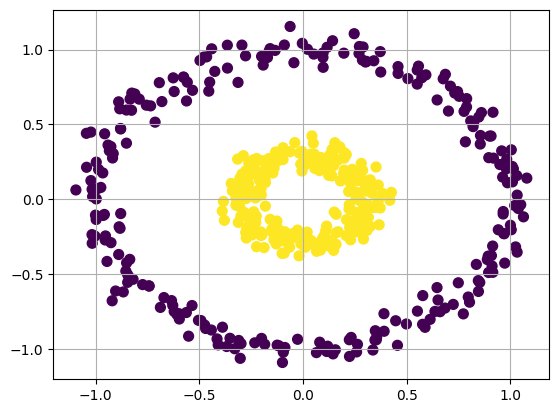

In [55]:
scatter = plt.scatter(X[:, 0], X[:, 1],
                     c=y, cmap='viridis', s=50)
plt.grid(True)

<ipython-input-56-fc73d419a254>:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c='y', cmap='viridis', edgecolor='k', s=50)
<ipython-input-56-fc73d419a254>:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c='y', cmap='viridis', edgecolor='k', s=50)
<ipython-input-56-fc73d419a254>:12: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c='y', cmap='viridis', edgecolor='k', s=50)


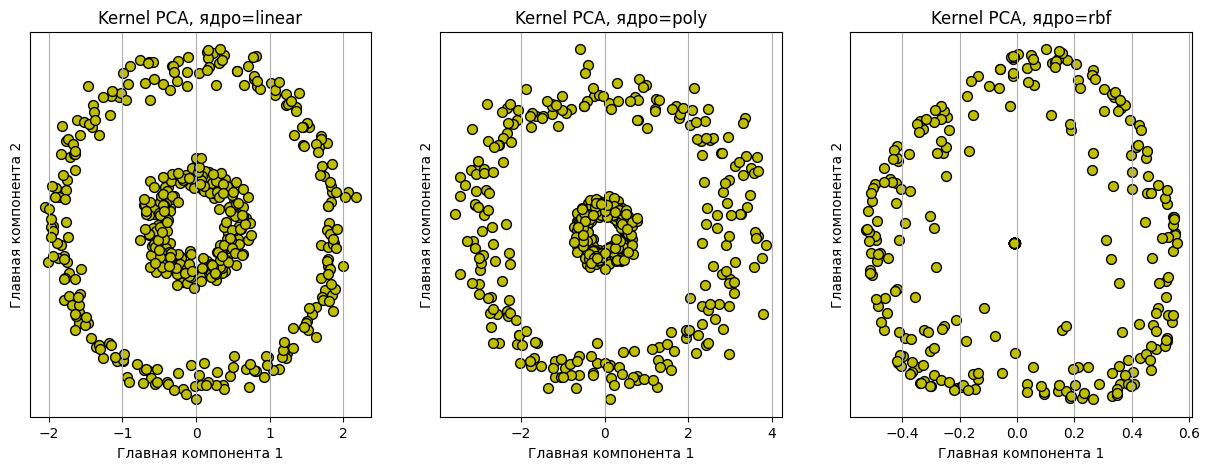

In [56]:
from sklearn.decomposition import KernelPCA

kernels = ['linear', 'poly', 'rbf']
plt.figure(figsize=(15, 5))
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
for i, kernel in enumerate(kernels):
    kpca = KernelPCA(n_components=2, kernel=kernel, gamma=10 if kernel == 'rbf' else None)
    X_kpca = kpca.fit_transform(X_scaled)

    plt.subplot(1, 3, i+1)
    plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c='y', cmap='viridis', edgecolor='k', s=50)
    plt.title(f'Kernel PCA, ядро={kernel}')
    plt.xlabel('Главная компонента 1')
    plt.ylabel('Главная компонента 2')
    plt.yticks([])
    plt.grid(True)

<ipython-input-57-0cd8f082ad12>:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c='y', cmap='viridis', edgecolor='k', s=50)
<ipython-input-57-0cd8f082ad12>:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c='y', cmap='viridis', edgecolor='k', s=50)
<ipython-input-57-0cd8f082ad12>:10: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c='y', cmap='viridis', edgecolor='k', s=50)


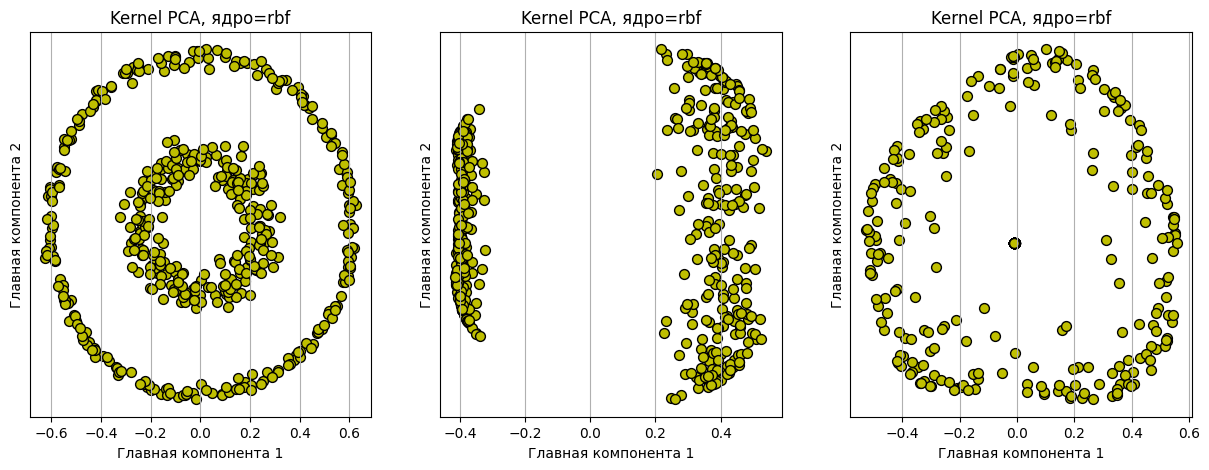

In [57]:
gamma_values = [0.1, 1, 10]
plt.figure(figsize=(15, 5))
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
for i, gamma in enumerate(gamma_values):
    kpca = KernelPCA(n_components=2, kernel='rbf', gamma=gamma)
    X_kpca = kpca.fit_transform(X_scaled)

    plt.subplot(1, 3, i+1)
    plt.scatter(X_kpca[:, 0], X_kpca[:, 1], c='y', cmap='viridis', edgecolor='k', s=50)
    plt.title(f'Kernel PCA, ядро={kernel}')
    plt.xlabel('Главная компонента 1')
    plt.ylabel('Главная компонента 2')
    plt.yticks([])
    plt.grid(True)

# ***Доп.задание***

1. Метод независимых компонент (ICA)

/usr/local/lib/python3.11/dist-packages/sklearn/decomposition/_fastica.py:598: UserWarning: n_components is too large: it will be set to 2
  warnings.warn(


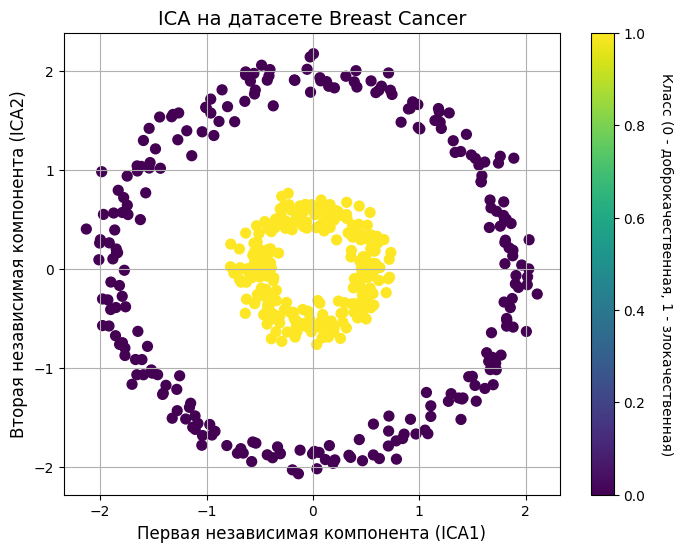

In [59]:
from sklearn.decomposition import FastICA

ica = FastICA(n_components=7, random_state=42)
X_ica = ica.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_ica[:, 0], X_ica[:, 1], c=y, cmap='viridis', s=50)
plt.xlabel('Первая независимая компонента (ICA1)', fontsize=12)
plt.ylabel('Вторая независимая компонента (ICA2)', fontsize=12)
plt.title('ICA на датасете Breast Cancer', fontsize=14)
cbar = plt.colorbar(scatter)
cbar.set_label('Класс (0 - доброкачественная, 1 - злокачественная)', rotation=270, labelpad=20, fontsize=10)
plt.grid(True)
plt.show()


Отличие ICA от PCA:

PCA ищет компоненты с максимальной дисперсией и ортогональностью, то есть взаимно перпендикулярные направления.

ICA пытается найти статистически независимые компоненты, что полезно для разделения смешанных сигналов, а не просто проекций с максимальной дисперсией.

ICA не гарантирует ортогональность компонентов.

2. Метод UMAP

In [61]:
pip install umap-learn

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


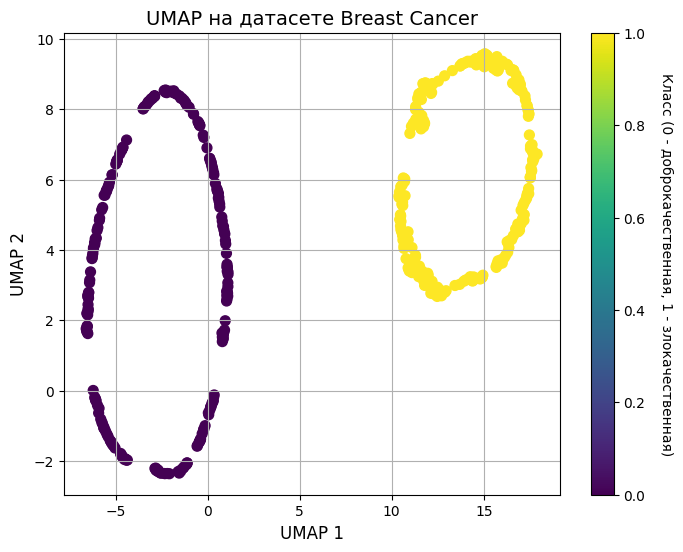

In [62]:
import umap

reducer = umap.UMAP(n_components=2, random_state=42)
X_umap = reducer.fit_transform(X_scaled)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(X_umap[:, 0], X_umap[:, 1], c=y, cmap='viridis', s=50)
plt.xlabel('UMAP 1', fontsize=12)
plt.ylabel('UMAP 2', fontsize=12)
plt.title('UMAP на датасете Breast Cancer', fontsize=14)
cbar = plt.colorbar(scatter)
cbar.set_label('Класс (0 - доброкачественная, 1 - злокачественная)', rotation=270, labelpad=20, fontsize=10)
plt.grid(True)
plt.show()


Особенности UMAP:

Сохраняет структуру данных, учитывая как локальные, так и глобальные свойства.

Быстрее t-SNE, работает хорошо на больших наборах.

Может использоваться для кластеризации и визуализации.

По сравнению с PCA — нелинейный метод, способный выявлять сложные структуры.

3. Влияние понижения размерности на качество классификации

In [64]:
data = load_breast_cancer()
X = data.data
y = data.target

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

clf = LogisticRegression(max_iter=1000, random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
acc_orig = accuracy_score(y_test, y_pred)
print(f"Точность классификации на исходных данных: {acc_orig:.4f}")

pca7 = PCA(n_components=7)
X_pca7 = pca7.fit_transform(X_scaled)

X_train_pca, X_test_pca, _, _ = train_test_split(X_pca7, y, test_size=0.3, random_state=42)

clf_pca = LogisticRegression(max_iter=1000, random_state=42)
clf_pca.fit(X_train_pca, y_train)
y_pred_pca = clf_pca.predict(X_test_pca)
acc_pca = accuracy_score(y_test, y_pred_pca)
print(f"Точность классификации после PCA (7 компонент): {acc_pca:.4f}")

Точность классификации на исходных данных: 0.9825
Точность классификации после PCA (7 компонент): 0.9883


4. Зависимость точности классификатора от числа компонент

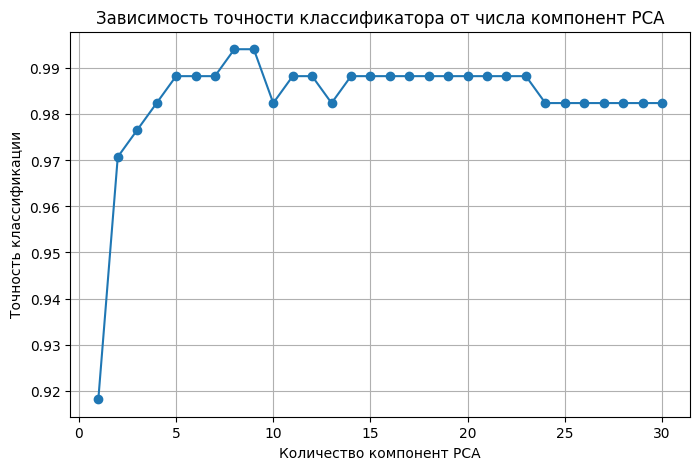

In [65]:
component_range = range(1, 31)
accuracy_scores = []

for n in component_range:
    pca = PCA(n_components=n)
    X_pca = pca.fit_transform(X_scaled)
    X_train_pca, X_test_pca, y_train, y_test = train_test_split(X_pca, y, test_size=0.3, random_state=42)

    clf = LogisticRegression(max_iter=1000, random_state=42)
    clf.fit(X_train_pca, y_train)
    y_pred = clf.predict(X_test_pca)
    accuracy_scores.append(accuracy_score(y_test, y_pred))

plt.figure(figsize=(8,5))
plt.plot(component_range, accuracy_scores, marker='o')
plt.xlabel('Количество компонент PCA')
plt.ylabel('Точность классификации')
plt.title('Зависимость точности классификатора от числа компонент PCA')
plt.grid(True)
plt.show()
